In [11]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import cv2 as cv
import random
from matplotlib import pyplot as plt
img_address = "drive/My Drive/Colab Notebooks/images.jpg"
img = cv.imread(img_address, 0)
img_address2 = "drive/My Drive/Colab Notebooks/grayscale.jpg"
img2 = cv.imread(img_address2, 0)

In [13]:
def gauss_noise(img,mean,standard_deviation):
    gaussian = np.random.normal(mean,standard_deviation,(img.shape[0],img.shape[1]))
    gaussian = gaussian.reshape(img.shape[0],img.shape[1]).astype('uint8')
    gauss_noise_img =cv.add(img , gaussian)
    plt.imshow(gauss_noise_img, cmap=plt.get_cmap('gray'))
    plt.plot() 
    return gauss_noise_img

In [14]:
def median_filter(img, filter_size):
    temp = []
    index = filter_size // 2
    new_img = []
    new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]== 0 or img[i][j] == 255 :
              coun=0
              for z in range(filter_size):
                if -1<i + z - index < img.shape[0]:   
                    for k in range(filter_size):
                      if(-1<j + k - index<img.shape[1]):
                          temp.append(img[i + z - index][j + k - index])
              temp.sort()
              new_img[i][j] = temp[int(len(temp) / 2)]
              temp = []
            else:
              new_img[i][j]= img[i][j]
    plt.imshow(new_img, cmap=plt.get_cmap('gray'))
    plt.plot()
    return new_img

In [15]:
def smoothing_filter(img, filter_size):
    temp = []
    index = filter_size // 2
    new_img = []
    new_img = np.zeros((img.shape[0], img.shape[1]), np.int32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j]== 0 or img[i][j] == 255 :
              for z in range(filter_size):
                if -1<i + z - index < img.shape[0]:   
                    for k in range(filter_size):
                      if(-1<j + k - index<img.shape[1]):
                          temp.append(img[i + z - index][j + k - index])
              mean = 0
              for m in range(len(temp)):
                mean+=temp[m]
              mean = mean/len(temp)
              new_img[i][j] =mean
              temp = []
            else:
              new_img[i][j]= img[i][j]
    plt.imshow(new_img, cmap=plt.get_cmap('gray'))
    plt.plot() 
    return new_img

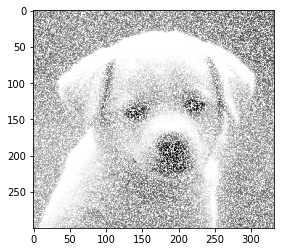

In [8]:
# gaussian noise
gauss_noise_img = gauss_noise(img2,0,5)

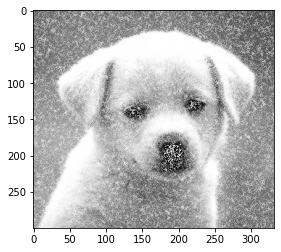

In [9]:
# smothing filter
smoothing_filter_img = smoothing_filter(gauss_noise_img, 5)

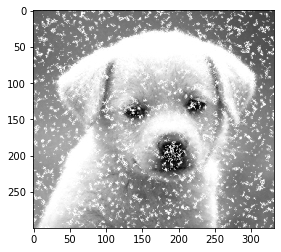

In [10]:
# median filter
median_filter_img = median_filter(gauss_noise_img, 5)